## Harmonics of a vibrating plate

This was the code I used for my honours project, calculating the vibrational modes of a thin metal plate. I will not show the derivation here, but the result was that, given a few simplifying assumption, the out of place motion of a metal plate is governed by the biharmonic equation;
$$
D \nabla^{4} w + \rho h\, w_{tt} = 0
$$
By treating the plate as an N by N grid of discrete points, we can calculate a matrix that approximates the bi laplacian. The exact matrix depends on the boundary condition; whether the edges of the plate are fixed or free to move. See calculate_matrix.py for the calculation of this matrix.

In [1]:

from calculate_matrix import matrix_free_BC

N= 32  ###side length of plate
v=0.3  ###passions ratio for plate

bi_lep = matrix_free_BC(N,v)

Hence, by computing the eigenvectors and eigenvalues of this, we can get the modes of vibration of the plate. Bellow I have used numpy calculated these, then sorted in ascending order, as the lowest eigenvalues correspond to the lower frequencies.

In [30]:
from scipy import sparse
import scipy.linalg as la
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



np.set_printoptions(threshold=100)
def vec_to_grid(vec, N):
    grid = []
    for i in range(0,N):
        grid.append(list(vec[i*N:(i+1)*N]))
    return grid

    

vals, vecs = np.linalg.eig(bi_lep)
idx = vals.argsort()  
vals = np.real(vals[idx][3:64])
vecs = np.real(vecs[:, idx][:, 3:64])

print(vals[0:16])


# save to file
np.savetxt("data/vals.csv", vals, delimiter=",")
np.savetxt("data/vecs.csv", vecs, delimiter=",")




[  180.77212838   380.7983484    584.43687487  1200.96893741
  1200.96893742  3666.62857236  3666.62857237  4010.72969167
  4710.56186453  5858.59722697 10918.44236402 10918.44236404
 13293.41705612 14547.93566983 16779.8368169  16779.83681691]


The first 3 eigenvectors do not represent proper vibrational modes, each instead representing either displacement of the entire plate, or rotation around the x/y axis. I have visualized these, once showing the value at each point, and once showing the nodes of vibration - that is the part of the plate that does not move. 

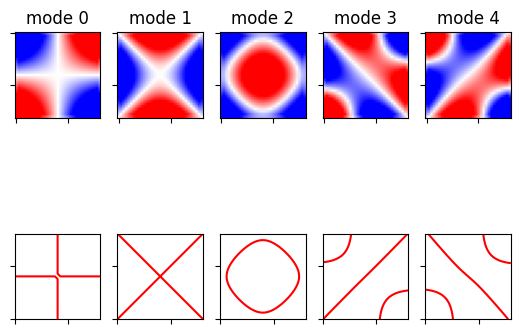

In [26]:
fig,axs=plt.subplots(2,5)

def show_vibrational_mode(W, title, i):
    axs[0][i].imshow(W, vmin = -0.03, vmax =0.03, rasterized=True, cmap = 'bwr')
    axs[1][i].contour(range(0,N+1), range(0,N+1), W, levels=[0],colors='red')
    axs[0][i].set_title(title)

    axs[0][i].axis('scaled')
    axs[1][i].axis('scaled')

    plt.setp(axs[0][i].get_xticklabels(), visible=False)
    plt.setp(axs[0][i].get_yticklabels(), visible=False)
    plt.setp(axs[1][i].get_xticklabels(), visible=False)
    plt.setp(axs[1][i].get_yticklabels(), visible=False)
    

for k in range(0, 5):
    grid = np.array(vec_to_grid(vecs[:,k ],N+1))
    grid = np.real(grid)
    show_vibrational_mode(grid, "mode " + str(k), k)

plt.show()


Many eigenvalues are repeated, hence any linear combination of there corresponding eigenvectors are also valid eigenvectors. Ive shown this bellow by showing different combinations of the 3rd and 4th eigenvectors, and for the 10th and 11th.

1200.9689374077802 1200.968937419739
10918.44236402481 10918.442364040622


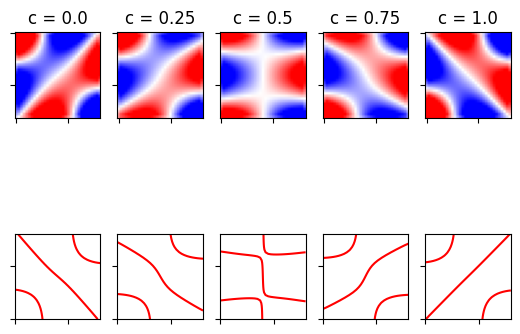

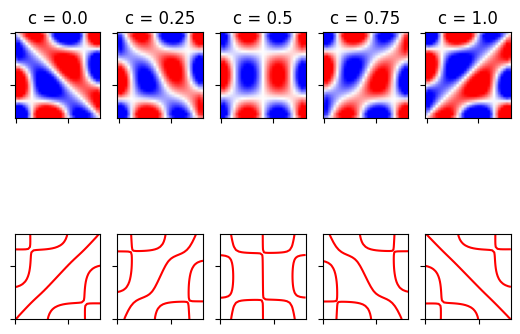

In [35]:
print(vals[3], vals[4])
print(vals[10], vals[11])

def show_mixed_eigenvectors(index1, index2):
    fig,axs=plt.subplots(2,5)

    A = np.array(vec_to_grid(vecs[:, index1],N+1))
    B = np.array(vec_to_grid(vecs[:, index2],N+1))

    for i in range(0,5):
        axs[0][i].imshow(A*(i/4)+ B*(1-i/4), vmin = -0.03, vmax =0.03, rasterized=True, cmap = 'bwr')
        axs[1][i].contour(range(0,N+1), range(0,N+1), A*(i/4)+ B*(1-i/4), levels=[0],colors='red')
        axs[0][i].set_title("c = "+ str(i/4))

        axs[0][i].axis('scaled')
        axs[1][i].axis('scaled')

        plt.setp(axs[0][i].get_xticklabels(), visible=False)
        plt.setp(axs[0][i].get_yticklabels(), visible=False)
        plt.setp(axs[1][i].get_xticklabels(), visible=False)
        plt.setp(axs[1][i].get_yticklabels(), visible=False)
        
    plt.show()

show_mixed_eigenvectors(3, 4 )
show_mixed_eigenvectors(10, 11 )